### 🖥️회귀 프로젝트 4: 로지스틱 회귀 기법을 통한 물/기름 분류 예측

- 용융 소자가 물 또는 오일에 잠긴 상태에서 획득한 디지털 신호 값과, 정답 라벨(1: 물, -1: 기름)로 이루어진 데이터셋입니다.

#### 📚 Features

- col1 ~ col10: 각 용융 소자가 측정한 전기 강도  
  *강도 = ( |측정 전압 - 기본 전압| / 기본 전압 ) x 100, 기본 전압은 공기 중에서 측정한 전극의 전압을 나타냄
  
#### 🎈 Target

- target: 물(1)/기름(-1)을 나타내는 정답 라벨

---

#### 📌 목차

1. 데이터 탐색 및 전처리
2. SMOTE를 통한 오버샘플링 진행
3. LDA를 통한 차원 축소 진행
4. LogisticRegression 모델을 통한 분류 예측
5. Classifier 모델을 사용한 분류 예측
6. 교차 검증을 통한 과적합 여부 확인
7. Threshold(임계값)에 따른 정밀도와 재현율 시각화
8. 정밀도와 재현율에 대한 분석

#### 1. 데이터 탐색 및 전처리

In [2]:
import pandas as pd

w_df = pd.read_csv('./datasets/water_oil.csv', sep=";")
w_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1
...,...,...,...,...,...,...,...,...,...,...,...
4470,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.89,72.89,1
4471,72.89,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.63,1
4472,72.63,72.89,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.63,1
4473,72.63,72.63,72.63,72.63,72.89,72.89,72.89,72.63,72.63,72.63,1


- 데이터의 정보를 확인해봅니다.

In [3]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4475 non-null   float64
 1   col2    4475 non-null   float64
 2   col3    4475 non-null   float64
 3   col4    4475 non-null   float64
 4   col5    4475 non-null   float64
 5   col6    4475 non-null   float64
 6   col7    4475 non-null   float64
 7   col8    4475 non-null   float64
 8   col9    4475 non-null   float64
 9   col10   4475 non-null   float64
 10  target  4475 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 384.7 KB


- 결측치가 없음을 확인할 수 있습니다.
- 중복행을 확인해봅니다.

In [4]:
w_df.duplicated().sum()

3137

- 중복행을 삭제합니다.

In [5]:
pre_w_df = w_df.drop_duplicates()
pre_w_df = pre_w_df.reset_index(drop=True)
pre_w_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,72.63,72.63,72.89,72.89,72.89,72.63,72.63,72.63,72.63,72.63,1
1334,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.89,72.89,72.89,1
1335,72.63,72.89,72.89,72.89,72.89,72.63,72.63,72.63,72.63,72.63,1
1336,72.63,72.63,72.63,72.63,72.89,72.89,72.89,72.63,72.63,72.63,1


- 데이터의 분포를 히스토그램을 통해 확인해봅니다.

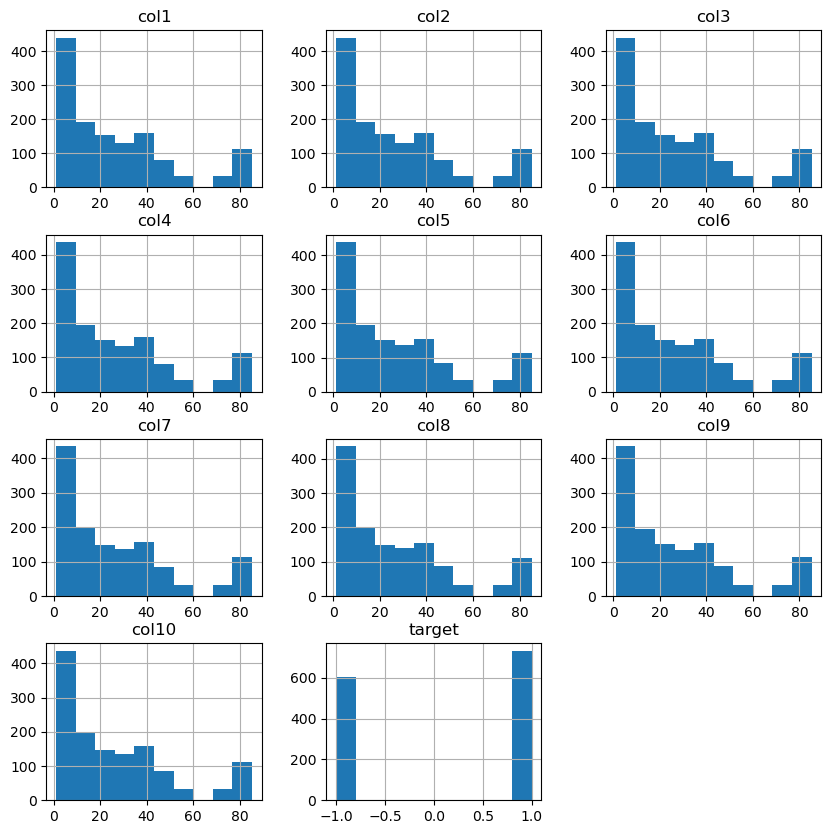

In [6]:
import matplotlib.pyplot as plt

pre_w_df.hist(figsize=(10, 10))
plt.show()

- 종속변수의 분포를 조정하기에 앞서, 각 독립변수의 분포를 보았을 때 대체로 동일한 양상을 띠므로 describe()를 통해 분포를 직접 확인해봅니다.

In [7]:
pre_w_df.iloc[:, :-1].describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1338.0,26.072332,24.515564,1.13,3.1600,19.865,39.4100,85.19
col2,1338.0,26.074753,24.515098,1.13,2.9800,19.950,39.4100,85.19
col3,1338.0,26.076726,24.512411,1.13,2.9800,19.930,39.4250,85.19
col4,1338.0,26.086682,24.518984,1.13,2.9700,19.965,39.4100,85.19
col5,1338.0,26.110897,24.513714,1.13,2.9800,20.020,39.4100,85.19
col6,1338.0,26.121129,24.515014,1.13,2.9700,19.965,39.4675,85.19
col7,1338.0,26.117862,24.513680,1.13,2.9700,20.000,39.4625,85.19
col8,1338.0,26.121428,24.525978,1.13,2.9700,19.930,39.4250,85.19
col9,1338.0,26.156771,24.518418,1.13,2.9725,19.930,39.4800,85.19
col10,1338.0,26.154611,24.525244,1.13,2.9725,19.875,39.4800,85.19


- 모든 독립변수의 평균이나 표준편차 및 4분위값이 완전히 동일한 값을 취하지는 않지만, 대체로 매우 비슷한 분포를 보이고 있습니다.
- 따라서 LDA를 통한 차원 축소를 진행하여도 무방하다고 판단됩니다.

- 현재 종속변수가 0과 1이 아닌 -1과 1로 구성되어 있으므로, 혼란을 방지하기 위해 0과 1로 레이블인코딩을 진행합니다.

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(pre_w_df.target)
pre_w_df.target = result
pre_w_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,72.63,72.63,72.89,72.89,72.89,72.63,72.63,72.63,72.63,72.63,1
1334,72.63,72.63,72.63,72.63,72.63,72.63,72.63,72.89,72.89,72.89,1
1335,72.63,72.89,72.89,72.89,72.89,72.63,72.63,72.63,72.63,72.63,1
1336,72.63,72.63,72.63,72.63,72.89,72.89,72.89,72.63,72.63,72.63,1


In [9]:
encoder.classes_

array([-1,  1], dtype=int64)

- **기름이 0, 물이 1**로 인코딩 되어있음을 알 수 있습니다.

#### 2. SMOTE를 통한 오버샘플링 진행
- 차원 축소를 진행하기에 앞서, 종속변수의 분포 비중을 맞추기 위해 SMOTE를 통한 오버샘플링을 진행합니다.

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

- SMOTE를 통해 오버샘플링한 훈련 데이터 및 훈련 데이터의 정답과, 테스트 데이터 및 테스트 데이터의 정답을 각각 데이터프레임으로 묶어줍니다.

In [11]:
train_df = pd.concat([over_X_train, over_y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [12]:
display(train_df)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,84.210000,84.210000,84.210000,84.650000,84.210000,84.210000,84.210000,84.210000,84.650000,84.650000,1
1,34.940000,34.940000,34.940000,34.940000,34.940000,34.940000,34.940000,34.940000,34.940000,34.940000,1
2,30.870000,31.540000,32.210000,32.550000,33.050000,33.560000,33.890000,34.230000,34.560000,34.900000,1
3,35.320000,35.320000,35.320000,35.320000,35.690000,35.690000,35.690000,35.690000,35.690000,35.690000,1
4,22.990000,22.820000,22.480000,22.320000,22.150000,21.980000,21.810000,21.640000,21.480000,21.310000,0
...,...,...,...,...,...,...,...,...,...,...,...
1167,10.700000,10.700000,10.700000,10.487596,10.700000,10.700000,10.542404,10.330000,10.700000,10.700000,0
1168,1.978499,1.978499,1.715358,1.833001,1.978499,1.833001,1.715358,1.715358,1.978499,1.833001,0
1169,3.322383,2.981778,3.292194,2.951589,2.951589,2.951589,2.951589,2.951589,3.292194,2.951589,0
1170,1.650000,1.347051,1.230000,1.650000,1.650000,1.650000,1.650000,1.650000,1.650000,1.532949,0


In [13]:
train_df.target.value_counts()

target
1    586
0    586
Name: count, dtype: int64

In [14]:
test_df.target.value_counts()

target
1    147
0    121
Name: count, dtype: int64

#### 3. LDA를 통한 차원 축소 진행
- 종속변수가 0 또는 1로, 이진 분류에 해당하므로 1차원으로 축소합니다.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(train_df.iloc[:, :-1], train_df.iloc[:, -1])
lda_test = lda.fit_transform(test_df.iloc[:, :-1], test_df.iloc[:, -1])

print(lda_train.shape, lda_test.shape)

(1172, 1) (268, 1)


In [16]:
lda_columns = [f'lda{i+1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = train_df['target']

lda_columns = [f'lda{i+1}' for i in range(lda_test.shape[1])]
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
lda_test_df.loc[:, 'target'] = test_df['target']

display(lda_train_df)

,lda1,target
0,-4.290462,1
1,-0.560565,1
2,-2.290833,1
3,-0.402023,1
4,1.026097,0
...,...,...
1167,0.851882,0
1168,1.397972,0
1169,1.382435,0
1170,1.464775,0


- 1차원으로 축소하였을 때 원래의 10개 feature를 기준으로 얼마나 표현하고 있는지 살펴봅니다.

In [17]:
print(lda.explained_variance_ratio_.sum())

1.0


- 10개 feature를 1개로 축소하였음에도 완벽하게 표현하고 있음을 알 수 있습니다.

#### 4. Classifier 모델을 사용한 분류 예측
- 먼저 평가 지표를 바탕으로 오차 행렬을 시각화하는 함수를 정의합니다.

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

- 사용할 Classifier 모델들은 다음과 같습니다.
- DTC  
- SVC  
- KNN  
- Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
- 각각 GridSearchCV를 통해 최적의 하이퍼 파라미터 탐색을 동시에 진행합니다.
- LogisticRegression

In [19]:
X_train, y_train = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.iloc[:, -1]

##### 1) DTC(Decision Tree Classifier) 분류 모델

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [7, 8, 9]
}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [7, 8, 9]},
             return_train_score=True)

In [21]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.959884,2
1,"{'max_depth': 5, 'min_samples_split': 8}",0.959884,2
2,"{'max_depth': 5, 'min_samples_split': 9}",0.960738,1
3,"{'max_depth': 6, 'min_samples_split': 7}",0.957323,5
4,"{'max_depth': 6, 'min_samples_split': 8}",0.957323,5
5,"{'max_depth': 6, 'min_samples_split': 9}",0.958178,4
6,"{'max_depth': 7, 'min_samples_split': 7}",0.951355,8
7,"{'max_depth': 7, 'min_samples_split': 8}",0.951355,8
8,"{'max_depth': 7, 'min_samples_split': 9}",0.954763,7


오차 행렬
[[113   8]
 [  2 145]]
정확도: 0.9627, 정밀도: 0.9477, 재현율: 0.9864, F1: 0.9667, ROC-AUC: 0.9601
################################################################################


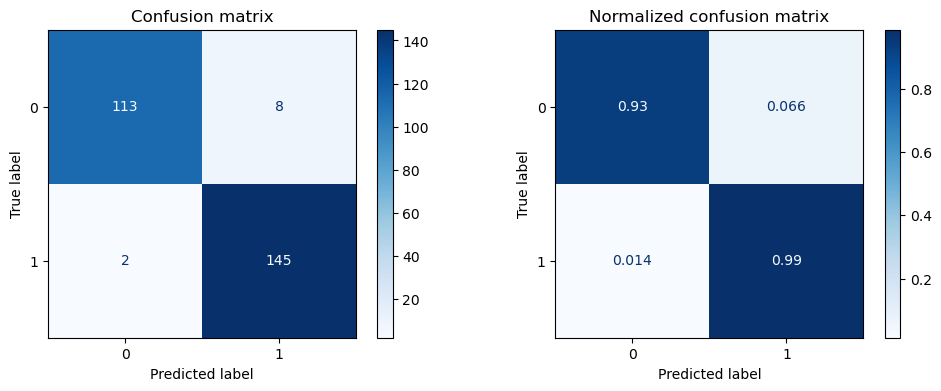

In [22]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
get_evaluation(y_test, dtc_prediction, dtc, X_test)

##### 2) SVC(Support Vector machine Classifier) 분류 모델

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svc = SVC(probability=True, verbose=2)

g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc.fit(X_train, y_train)

[LibSVM]

GridSearchCV(cv=5, estimator=SVC(probability=True, verbose=2), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [24]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.881397,59
1,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.694021,71
2,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.881397,59
3,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.743593,68
4,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.881397,59
...,...,...,...
67,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.964997,7
68,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.964146,8
69,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.966707,1
70,"{'C': 100, 'gamma': 100, 'kernel': 'linear'}",0.964146,8


오차 행렬
[[113   8]
 [  2 145]]
정확도: 0.9627, 정밀도: 0.9477, 재현율: 0.9864, F1: 0.9667, ROC-AUC: 0.9601
################################################################################


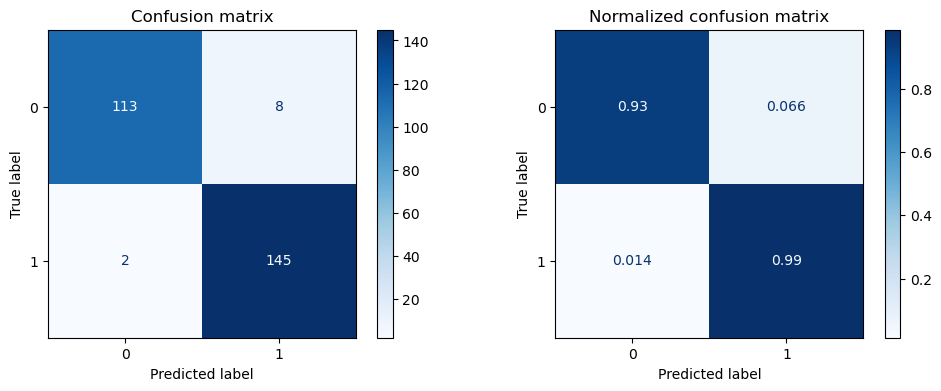

In [25]:
svc = g_svc.best_estimator_
svc_prediction = svc.predict(X_test)
get_evaluation(y_test, svc_prediction, svc, X_test)

##### 3) KNN(K-Nearest Neighbors) 분류 모델

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [1, 3, 5, 7, 9]
}

g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             return_train_score=True)

In [27]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 1},0.947085,5
1,{'n_neighbors': 3},0.961589,4
2,{'n_neighbors': 5},0.966703,2
3,{'n_neighbors': 7},0.966703,2
4,{'n_neighbors': 9},0.967558,1


오차 행렬
[[114   7]
 [  2 145]]
정확도: 0.9664, 정밀도: 0.9539, 재현율: 0.9864, F1: 0.9699, ROC-AUC: 0.9643
################################################################################


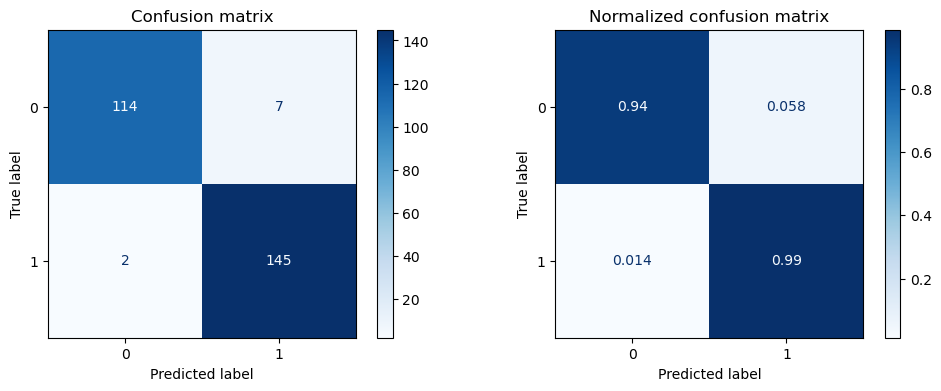

In [28]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
get_evaluation(y_test, knn_prediction, knn, X_test)

##### 4) Ensemble - RandomForestClassifier(Bagging)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12],
    'min_samples_split': [10, 11, 12],
    'n_estimators': [10, 50, 100, 500, 1000]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             return_train_score=True)

In [30]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.958174,38
1,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.959876,31
2,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.958171,40
3,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.959025,34
4,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.959880,29
5,"{'max_depth': 10, 'min_samples_split': 11, 'n_...",0.961593,9
6,"{'max_depth': 10, 'min_samples_split': 11, 'n_...",0.961586,10
7,"{'max_depth': 10, 'min_samples_split': 11, 'n_...",0.959022,37
8,"{'max_depth': 10, 'min_samples_split': 11, 'n_...",0.960735,15
9,"{'max_depth': 10, 'min_samples_split': 11, 'n_...",0.962437,5


오차 행렬
[[114   7]
 [  2 145]]
정확도: 0.9664, 정밀도: 0.9539, 재현율: 0.9864, F1: 0.9699, ROC-AUC: 0.9643
################################################################################


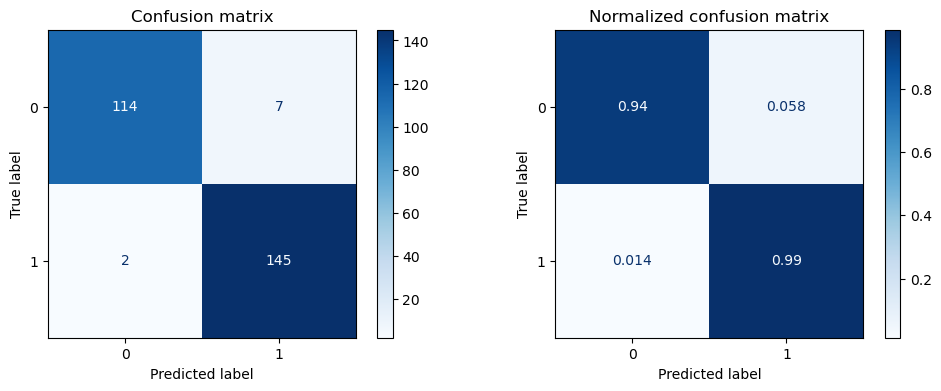

In [31]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
get_evaluation(y_test, rfc_prediction, rfc, X_test)

##### 5) Ensemble - VotingClassifier(Voting)
- (1) Hard Voting

In [32]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='hard', n_jobs=-1)

hard_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=9)),
                             ('svc',
                              SVC(C=1, gamma=10, probability=True, verbose=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=9))],
                 n_jobs=-1)

오차 행렬
[[114   7]
 [  2 145]]
정확도: 0.9664, 정밀도: 0.9539, 재현율: 0.9864, F1: 0.9699, ROC-AUC: 0.9643
################################################################################


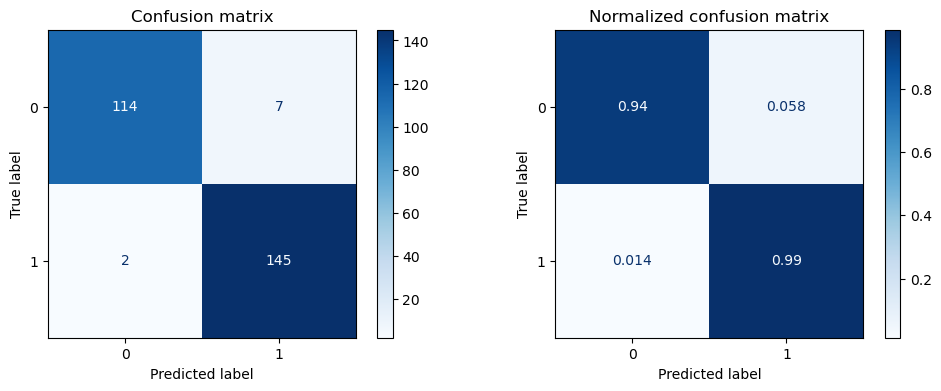

In [34]:
hard_vc_prediction = hard_vc.predict(X_test)
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)

- (2) Soft Voting

In [35]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='soft', n_jobs=-1)

soft_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=9)),
                             ('svc',
                              SVC(C=1, gamma=10, probability=True, verbose=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=9))],
                 n_jobs=-1, voting='soft')

오차 행렬
[[114   7]
 [  2 145]]
정확도: 0.9664, 정밀도: 0.9539, 재현율: 0.9864, F1: 0.9699, ROC-AUC: 0.9643
################################################################################


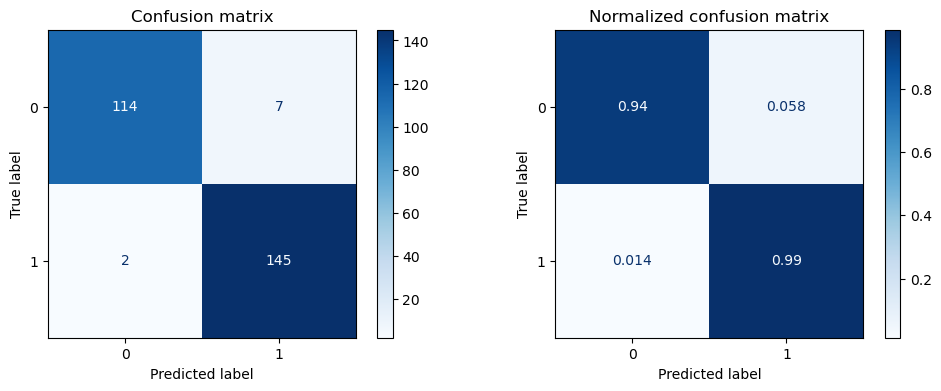

In [36]:
soft_vc_prediction = soft_vc.predict(X_test)
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)

##### 6) Ensemble - AdaBoostClassifier(Boosting)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [38]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.966703,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.967558,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.966703,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.966703,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.966703,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.964143,10
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.966703,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.966703,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.959018,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.966703,2


오차 행렬
[[114   7]
 [  0 147]]
정확도: 0.9739, 정밀도: 0.9545, 재현율: 1.0000, F1: 0.9767, ROC-AUC: 0.9711
################################################################################


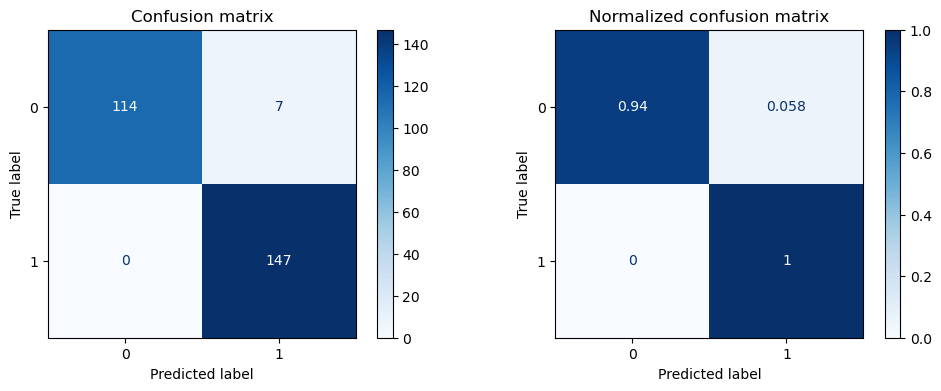

In [39]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
get_evaluation(y_test, ada_prediction, ada, X_test)

##### 7) Ensemble - GradientBoostingClassifier(Boosting)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [41]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.947085,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.947085,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.947085,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.947085,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.947085,1
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.947085,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.947085,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.947085,1
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.947085,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.947085,1


오차 행렬
[[111  10]
 [  1 146]]
정확도: 0.9590, 정밀도: 0.9359, 재현율: 0.9932, F1: 0.9637, ROC-AUC: 0.9553
################################################################################


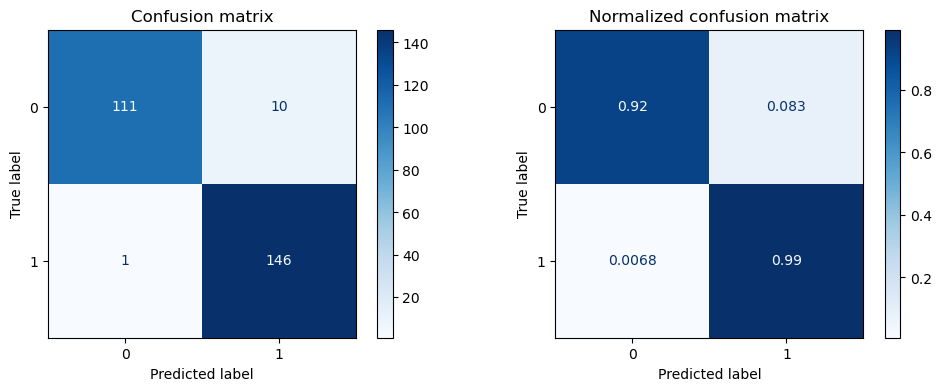

In [42]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
get_evaluation(y_test, gbc_prediction, gbc, X_test)

##### 8) Ensemble - XGBClassifier(Boosting)
- eval_set 파라미터에 전달하기 위한 검증 세트를 분리하고 진행합니다.

In [43]:
from sklearn.model_selection import train_test_split

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [44]:
from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.46751	validation_1-logloss:0.46371
[1]	validation_0-logloss:0.34321	validation_1-logloss:0.33664
[2]	validation_0-logloss:0.26462	validation_1-logloss:0.25726
[3]	validation_0-logloss:0.21382	validation_1-logloss:0.20404
[4]	validation_0-logloss:0.17868	validation_1-logloss:0.16739
[5]	validation_0-logloss:0.15413	validation_1-logloss:0.14193
[6]	validation_0-logloss:0.13606	validation_1-logloss:0.12357
[7]	validation_0-logloss:0.12323	validation_1-logloss:0.11095
[8]	validation_0-logloss:0.11425	validation_1-logloss:0.10138
[9]	validation_0-logloss:0.10721	validation_1-logloss:0.09507
[10]	validation_0-logloss:0.10221	validation_1-logloss:0.09070
[11]	validation_0-logloss:0.09849	validation_1-logloss:0.08685
[12]	validation_0-logloss:0.09585	validation_1-logloss:0.08407
[13]	validation_0-logloss:0.09379	validation_1-logloss:0.08183
[14]	validation_0-logloss:0.09234	validation_1-logloss:0.08035
[15]	validation_0-logloss:0.09118	validation_1-logloss:0.07890
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [45]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.965001,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.963299,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.963299,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.963299,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.963299,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.963299,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.963299,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.963299,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.963299,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.963299,2


오차 행렬
[[113   8]
 [  2 145]]
정확도: 0.9627, 정밀도: 0.9477, 재현율: 0.9864, F1: 0.9667, ROC-AUC: 0.9601
################################################################################


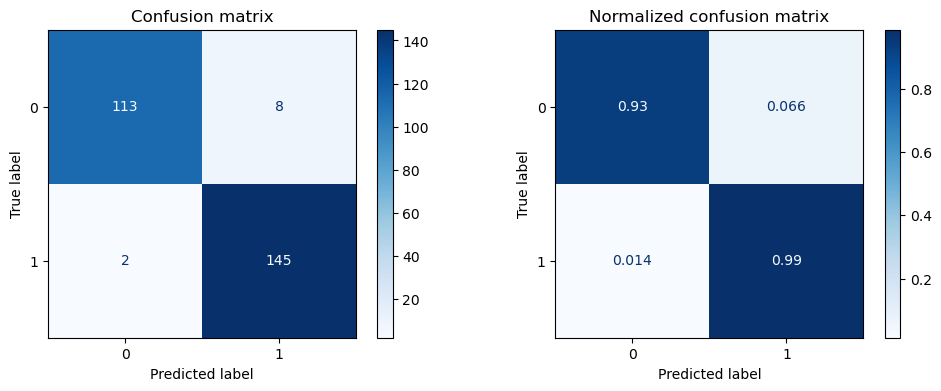

In [46]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
get_evaluation(y_test, xgb_prediction, xgb, X_test)

##### 9) Ensemble - LGBMClassifier(Boosting)
- 마찬가지로 검증 세트가 필요하므로 위에서 분리한 검증 세트를 사용합니다.

In [47]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Number of positive: 586, number of negative: 586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [48]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.966703,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.966703,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.966703,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.966703,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.964150,8
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.967554,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.966703,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.966703,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.964150,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.960742,12


오차 행렬
[[114   7]
 [  1 146]]
정확도: 0.9701, 정밀도: 0.9542, 재현율: 0.9932, F1: 0.9733, ROC-AUC: 0.9677
################################################################################


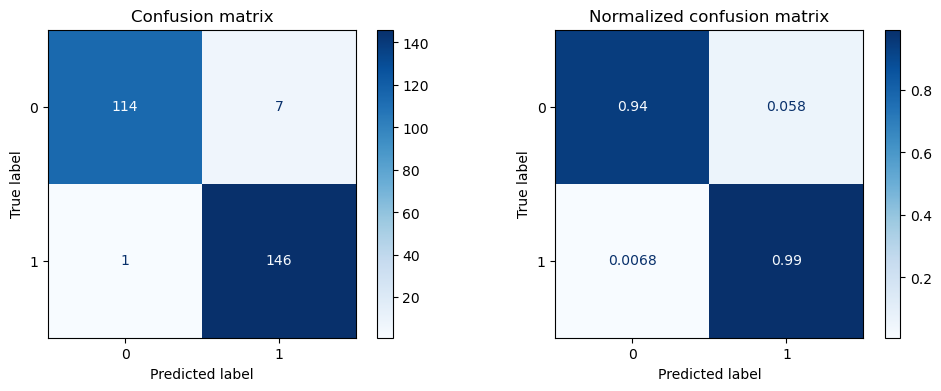

In [49]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

##### 10) LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression(solver='liblinear', penalty='l1', C=1, random_state=124)
logistic_r.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=124, solver='liblinear')

오차 행렬
[[116   5]
 [  2 145]]
정확도: 0.9739, 정밀도: 0.9667, 재현율: 0.9864, F1: 0.9764, ROC-AUC: 0.9725
################################################################################


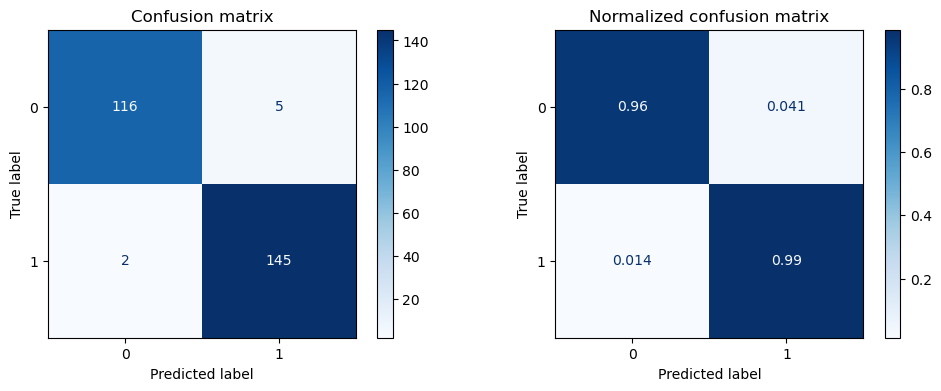

In [61]:
logistic_prediction = logistic_r.predict(X_test)
get_evaluation(y_test, logistic_prediction, logistic_r, X_test)

#### 5. 모델별 평가 지표 시각화
- DTC, SVC, KNN, RFC의 평가 지표를 시각화합니다.
- Hard/Soft Voting의 평가 지표를 시각화합니다.
- AdaBoost, GBC, XGBoost, LightGBM의 평가 지표를 시각화합니다.
- LogisticRegression 모델을 포함한 전체 평가 지표를 비교 시각화합니다.

##### 1) DTC, SVC, KNN, RFC의 평가 지표

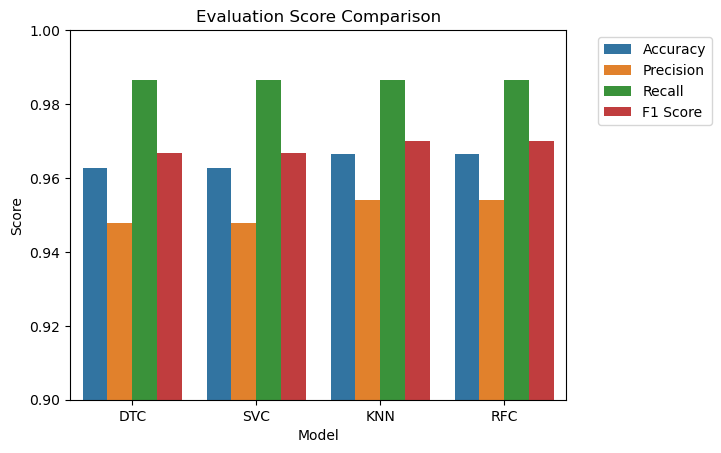

DTC의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
SVC의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
KNN의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
RFC의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)

dtc_precision = precision_score(y_test, dtc_prediction)
svc_precision = precision_score(y_test, svc_prediction)
knn_precision = precision_score(y_test, knn_prediction)
rfc_precision = precision_score(y_test, rfc_prediction)

dtc_recall = recall_score(y_test, dtc_prediction)
svc_recall = recall_score(y_test, svc_prediction)
knn_recall = recall_score(y_test, knn_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)

dtc_f1 = f1_score(y_test, dtc_prediction)
svc_f1 = f1_score(y_test, svc_prediction)
knn_f1 = f1_score(y_test, knn_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)

models = ['DTC', 'SVC', 'KNN', 'RFC']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1]

data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.ylim(0.9, 1)
plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

##### 2) Hard/Soft Voting Classifier의 평가 지표

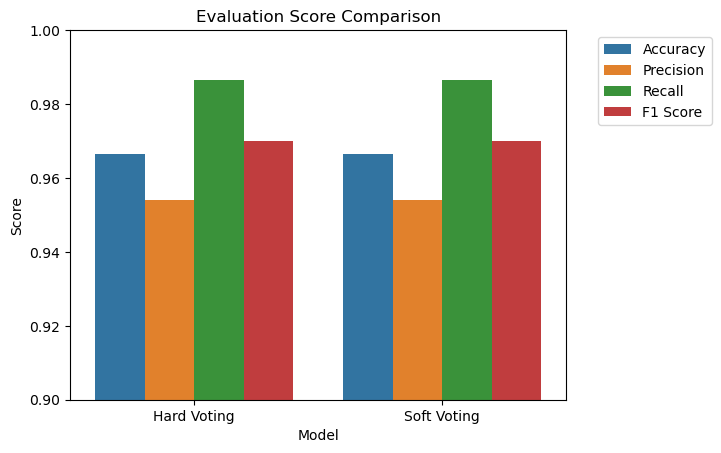

Hard Voting의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
Soft Voting의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%


In [64]:
hard_accuracy = accuracy_score(y_test, hard_vc_prediction)
soft_accuracy = accuracy_score(y_test, soft_vc_prediction)

hard_precision = precision_score(y_test, hard_vc_prediction)
soft_precision = precision_score(y_test, soft_vc_prediction)

hard_recall = recall_score(y_test, hard_vc_prediction)
soft_recall = recall_score(y_test, soft_vc_prediction)

hard_f1 = f1_score(y_test, hard_vc_prediction)
soft_f1 = f1_score(y_test, soft_vc_prediction)

models = ['Hard Voting', 'Soft Voting']
accuracy_scores = [hard_accuracy, soft_accuracy]
precisions = [hard_precision, soft_precision]
recalls = [hard_recall, soft_recall]
f1_scores = [hard_f1, soft_f1]

data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.ylim(0.9, 1)
plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

for i in range(2):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

##### 3) AdaBoost, GBM, XGBoost, LightGBM의 평가 지표

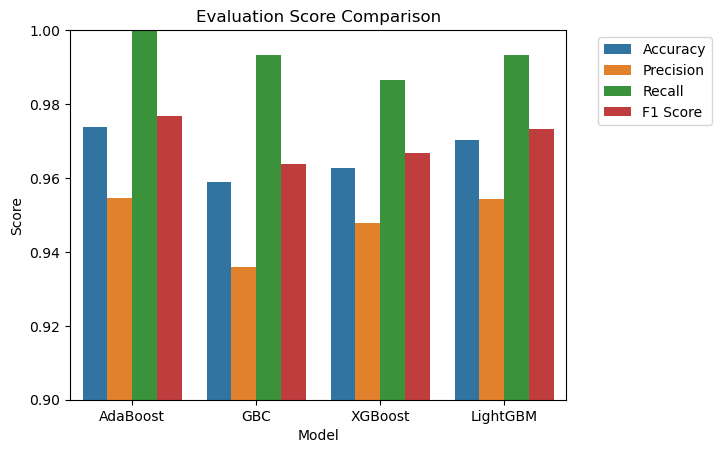

AdaBoost의 정확도: 97.3881%, 정밀도: 95.4545%, 재현율: 100.0%, F1 Score: 97.6744%
GBC의 정확도: 95.8955%, 정밀도: 93.5897%, 재현율: 99.3197%, F1 Score: 96.3696%
XGBoost의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
LightGBM의 정확도: 97.0149%, 정밀도: 95.4248%, 재현율: 99.3197%, F1 Score: 97.3333%


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

ada_precision = precision_score(y_test, ada_prediction)
gbc_precision = precision_score(y_test, gbc_prediction)
xgb_precision = precision_score(y_test, xgb_prediction)
lgbm_precision = precision_score(y_test, lgbm_prediction)

ada_recall = recall_score(y_test, ada_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
lgbm_recall = recall_score(y_test, lgbm_prediction)

ada_f1 = f1_score(y_test, ada_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)
lgbm_f1 = f1_score(y_test, lgbm_prediction)

models = ['AdaBoost', 'GBC', 'XGBoost', 'LightGBM']
accuracy_scores = [ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [ada_recall, gbc_recall, xgb_recall, lgbm_recall]
f1_scores = [ada_f1, gbc_f1, xgb_f1, lgbm_f1]

data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.ylim(0.9, 1)
plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

##### 4) LogisticRegression 모델을 포함한 전체 모델의 평가 지표

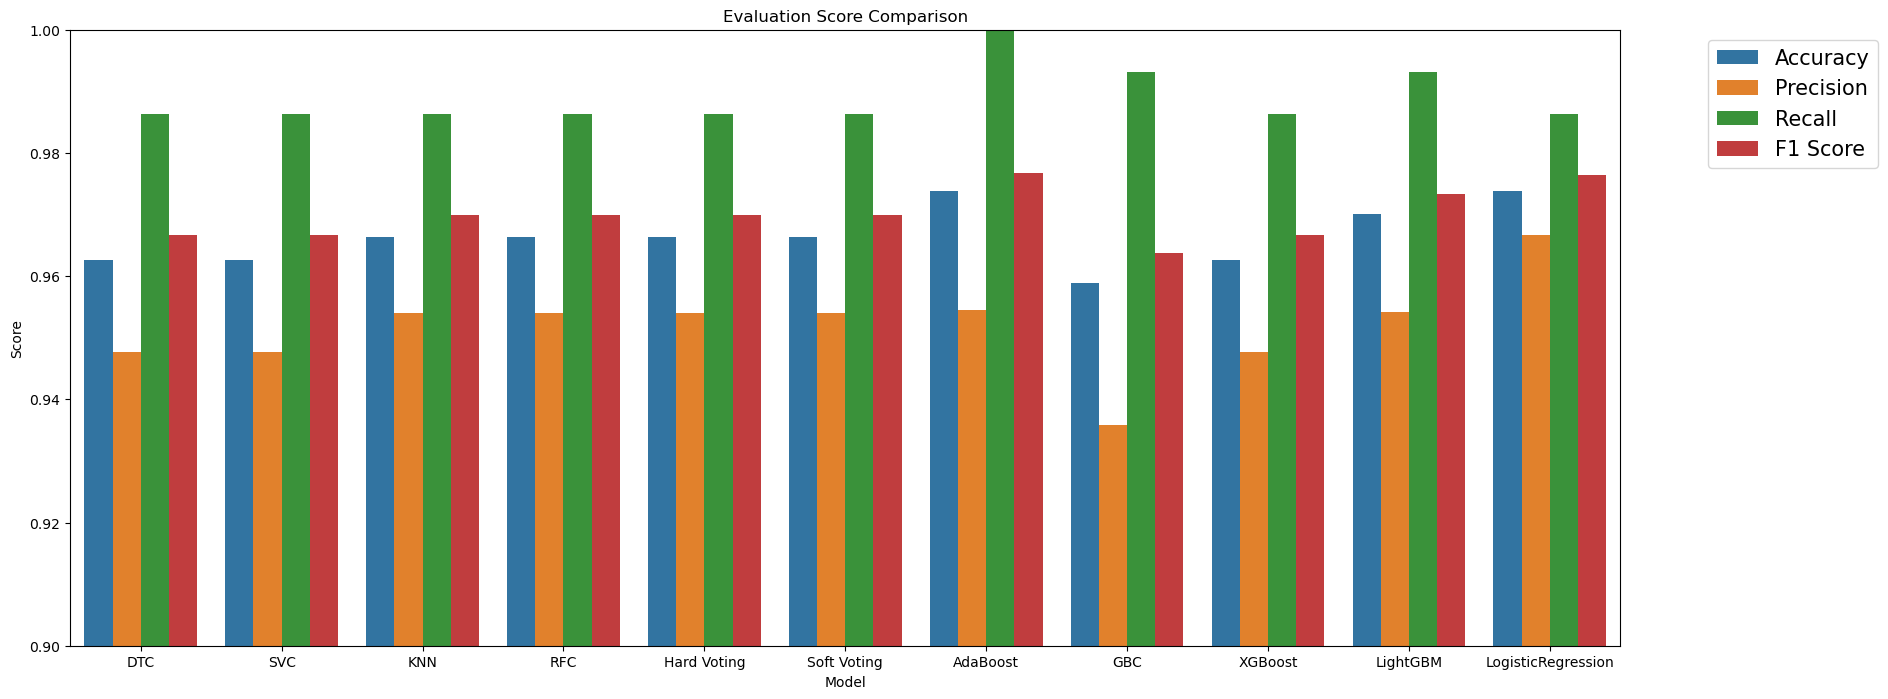

DTC의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
SVC의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
KNN의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
RFC의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
Hard Voting의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
Soft Voting의 정확도: 96.6418%, 정밀도: 95.3947%, 재현율: 98.6395%, F1 Score: 96.99%
AdaBoost의 정확도: 97.3881%, 정밀도: 95.4545%, 재현율: 100.0%, F1 Score: 97.6744%
GBC의 정확도: 95.8955%, 정밀도: 93.5897%, 재현율: 99.3197%, F1 Score: 96.3696%
XGBoost의 정확도: 96.2687%, 정밀도: 94.7712%, 재현율: 98.6395%, F1 Score: 96.6667%
LightGBM의 정확도: 97.0149%, 정밀도: 95.4248%, 재현율: 99.3197%, F1 Score: 97.3333%
LogisticRegression의 정확도: 97.3881%, 정밀도: 96.6667%, 재현율: 98.6395%, F1 Score: 97.6431%


In [70]:
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
logistic_precision = precision_score(y_test, logistic_prediction)
logistic_recall = recall_score(y_test, logistic_prediction)
logistic_f1 = f1_score(y_test, logistic_prediction)

models = ['DTC', 'SVC', 'KNN', 'RFC', 'Hard Voting', 'Soft Voting', 'AdaBoost', 
          'GBC', 'XGBoost', 'LightGBM', 'LogisticRegression']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy, hard_accuracy, 
                   soft_accuracy, ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy, logistic_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision, hard_precision, 
              soft_precision, ada_precision, gbc_precision, xgb_precision, lgbm_precision, logistic_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall, hard_recall, 
           soft_recall, ada_recall, gbc_recall, xgb_recall, lgbm_recall, logistic_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1, hard_f1, 
             soft_f1, ada_f1, gbc_f1, xgb_f1, lgbm_f1, logistic_f1]

data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

plt.figure(figsize=(20, 8))

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.ylim(0.9, 1)
plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)
plt.show()

for i in range(11):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

- F1 Score가 가장 높은 AdaBoost 모델과 LogisticRegression 모델 중, **Adaboost의 경우 재현율(Recall)이 1.0으로 과적합의 우려**가 있으므로,  
**LogisticRegression 모델이 가장 적합한 것**으로 보입니다.

#### 6. 교차 검증을 통한 과적합 여부 확인
- 앞서 LDA를 통해 1차원으로 축소 후 LogisticRegression 모델로 예측을 진행하였을 때, 정확도가 약 0.9739, ROC가 약 0.9725로 매우 높게 나타났습니다.
- 따라서 교차 검증을 통해 훈련 데이터에서의 교차 검증 시 정확도와 실제 테스트 데이터에 대한 예측 정확도를 비교해봅니다.

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=124)

X_train, X_test, y_train, y_test = lda_train_df.iloc[:, :-1], lda_test_df.iloc[:, :-1], lda_train_df.iloc[:, -1], lda_test_df.iloc[:, -1]

logistic_r = LogisticRegression(solver='liblinear', penalty='l1', C=1, random_state=124)
score = cross_val_score(logistic_r, X_train, y_train, cv=kfold, scoring='accuracy')

print(score)
print(f'교차 검증 시 평균 정확도: {np.round(np.mean(score), 4)}')

[0.95762712 0.94915254 0.96581197 0.97435897 0.97435897 0.96581197
 0.93162393 0.96581197 0.97435897 0.97435897]
교차 검증 시 평균 정확도: 0.9633


In [20]:
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)
print(f'테스트 데이터에 대한 실제 예측 정확도: {np.round(accuracy_score(y_test , prediction), 4)}')

테스트 데이터에 대한 실제 예측 정확도: 0.9739


- 교차 검증 시의 평균 정확도와 테스트 데이터에 대한 실제 예측 정확도를 비교했을 때, 실제 예측의 정확도가 좀 더 높았습니다.
- 따라서 **훈련 데이터에 대한 과적합은 발생하지 않았다고 판단됩니다.**

#### 7. Threshold(임계값)에 따른 정밀도와 재현율 시각화
- 정밀도(precision)와 재현율(recall)의 trade-off를 시각화해봅니다.

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

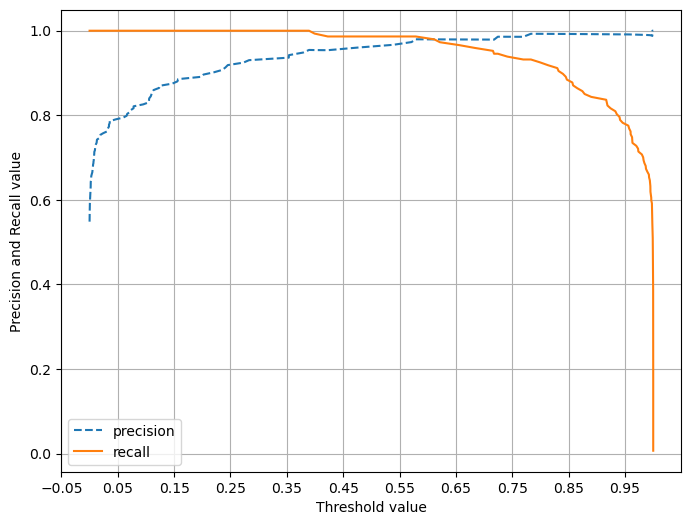

In [22]:
precision_recall_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1])

- threshold value가 약 0.6일 때를 기준으로 정밀도와 재현율이 서로 교차하고 있음을 알 수 있습니다.

- 다음은 이때의 ROC Curve를 시각화해봅니다.

In [24]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

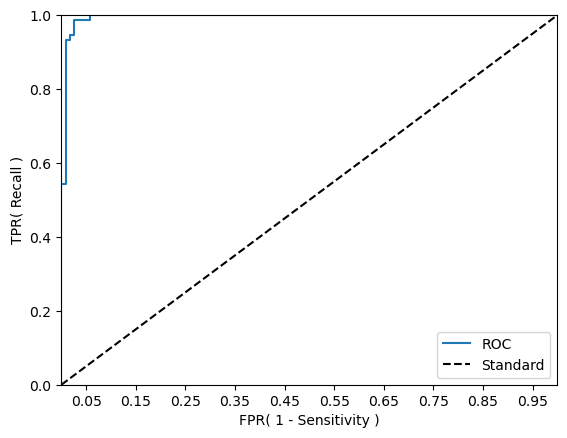

In [25]:
roc_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1].reshape(-1, 1))

- 현재 ROC-AUC 값이 약 0.9725로 1에 매우 가깝기 때문에, ROC Curve 아래의 영역 또한 가로 1, 세로 1의 직사각형에 매우 가까운 모습을 볼 수 있습니다.

#### 8. 📌정밀도와 재현율에 대한 분석

- 현재 주어진 이진 분류 상황에서 TP, FP, TN, FN과 정밀도 및 재현율이 나타내는 개념은 아래와 같습니다(0: 기름, 1: 물).
  
- TP: 모델이 물에 잠긴 상황을 물에 잠긴 상황으로 올바르게 분류한 경우.
- FP: 모델이 기름에 잠긴 상황을 물에 잠긴 상황으로 잘못 분류한 경우(오진, error I).
- TN: 모델이 기름에 잠긴 상황을 기름에 잠긴 상황으로 올바르게 분류한 경우.
- FN: 모델이 물에 잠긴 상황을 기름에 잠긴 상황으로 잘못 분류한 경우(놓침, error II).

- 정밀도 (Precision): 모델이 물에 잠긴 상황으로 예측한 상황 중에서 실제로 물에 잠긴 상황의 비율을 나타냅니다. 즉, 양성 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정합니다.
- 재현율 (Recall): 실제로 물에 잠긴 상황 중에서 모델이 물에 잠긴 상황으로 정확하게 예측한 상황의 비율을 나타냅니다. 즉, 모델이 얼마나 많은 물에 잠긴 상황을 "놓치지 않고" 감지했는지 측정합니다.

---

- 물과 기름 모두 전기가 자유롭게 흐르지 않지만, 전기적으로 비전도성인 물과 기름 간에는 차이가 있습니다. 일반적으로 물은 전기적으로 더 좋은 전도체로 간주됩니다. 물은 이온을 가지고 있으며 이온이 전기를 전달하는 데에 중요한 역할을 하기 때문입니다. 그러나 기름은 전기적으로 전도성이 낮습니다. 기름은 이온을 가지고 있지 않거나 매우 적기 때문에 전기를 전달하는 데에 물보다는 훨씬 더 낮은 능력을 가지고 있습니다.

- 따라서 전기 회로에서 물과 기름이 상호 작용할 때, 물은 전기를 더 잘 전달할 수 있으며, 이에 따라 더 많은 전기적 문제가 발생할 수 있습니다.
- 반면에 기름은 전기적으로 전도성이 낮기 때문에 전기 회로와의 상호 작용이 물보다는 덜할 수 있습니다.

- 이러한 이유로 물에 잠긴 상황이 전기 회로에 더 큰 위험을 가져올 수 있으므로, error II의 피해가 error I의 피해보다 크다는 결론을 내릴 수 있습니다.
- 즉, FN을 낮추기 위해 재현율을 높여야 합니다.
- 앞선 Logistic Regression 모델의 성능 평가 결과는 아래와 같았습니다.

**[정확도: 0.9739, 정밀도: 0.9667, 재현율: 0.9864, F1: 0.9764, ROC-AUC: 0.9725]**

<img src="./images/logistic_regression_confusion_matrix.png">

- 앞서 임계치에 따른 정밀도와 재현율을 시각화한 그래프에서 볼 수 있듯이, 재현율을 높이기 위해 임계치를 낮출 경우,  
  재현율의 상승폭보다 정밀도의 하락폭이 더 크며,  
  이미 재현율은 약 0.9864로 준수한 성능을 보이기 때문에 임계치 조정은 필요 없을 것으로 판단됩니다.

<img src="./images/logistic_regression_precision_recall.png" width="500px">